In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [ ]:
L = 300 # total chain length
t = 1   # hopping energy

# consider the half-filled substate (length M = L/2)
half_filled = L // 2

In [ ]:
# 1D tight-binding chain
# nearest-neighbour hopping & uniform amplitude
H = np.zeros((L,L), dtype=np.float64)
for i in range(L):
    H[i, (i + 1) % L] = -t
    H[i, (i - 1) % L] = -t
print('hopping hamiltonial is = ', H)

# diagonalize hopping hamiltonian
evals, evecs = la.eigh(H)
print('evals = ', evals, 'dimensions = ', evals.shape)
print('evecs = ', evecs, 'dimensions = ', evecs.shape)
# evecs & evals of single-particle states

hopping hamiltonial is =  [[ 0. -1.  0. ...  0.  0. -1.]
 [-1.  0. -1. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ... -1.  0. -1.]
 [-1.  0.  0. ...  0. -1.  0.]]
evals =  [-2.00000000e+00 -1.99956137e+00 -1.99956137e+00 -1.99824566e+00
 -1.99824566e+00 -1.99605346e+00 -1.99605346e+00 -1.99298572e+00
 -1.99298572e+00 -1.98904379e+00 -1.98904379e+00 -1.98422940e+00
 -1.98422940e+00 -1.97854467e+00 -1.97854467e+00 -1.97199207e+00
 -1.97199207e+00 -1.96457450e+00 -1.96457450e+00 -1.95629520e+00
 -1.95629520e+00 -1.94715781e+00 -1.94715781e+00 -1.93716632e+00
 -1.93716632e+00 -1.92632513e+00 -1.92632513e+00 -1.91463900e+00
 -1.91463900e+00 -1.90211303e+00 -1.90211303e+00 -1.88875274e+00
 -1.88875274e+00 -1.87456398e+00 -1.87456398e+00 -1.85955297e+00
 -1.85955297e+00 -1.84372630e+00 -1.84372630e+00 -1.82709092e+00
 -1.82709092e+00 -1.80965410e+00 -1.80965410e+00 -1.79142352e+00
 -1.79142352e+00 -1.77240716e+00 -1.77240716e+00 -1.752613

In [ ]:
# occupies the lowest half-filling states (eigen energies sorted acsendingly)
occu_indices = np.argsort(evals)[:half_filled]
print('occupied indices = ', occu_indices)
# corresponding eigenvectors (occupied single-particle states)
occu_psi = evecs[:, occu_indices]
print('occupied eigenvectors = ', occu_psi, 'dimensions = ', occu_psi.shape)

occupied indices =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149]
occupied eigenvectors =  [[-5.77350269e-02  0.00000000e+00  8.16496581e-02 ...  8.16496581e-02
   0.00000000e+00 -8.16496581e-02]
 [-5.77350269e-02  1.70994142e-03  8.16317510e-02 ...  1.70994142e-03
   8.16317510e-02 -3.62597321e-17]
 [-5.77350269e-02  3.41913281e-03  8.15780375e-02 ... -8.15780375e-02
   3.41913281e-03  8.16496581e-02]
 ...
 [-5.77350269e-02 -5.1268

In [ ]:
# correlation matrix for the full system: C_ij = <c_i† c_j>
C_full = occu_psi @ occu_psi.conj().T

# entanglement entropy of the subsystem from corr. matrix
# takes corr. matrix of subsystem, returns scalar
def entanglement_entropy(c_sub):

  # diagonalize corr. matrix to get eigenvalues ζ_k
  # la.eigvalsh is for Hermitian (or real symmetric) matrices
  zeta = la.eigvalsh(c_sub)

  # prevent numerical instability when ζ_k is very close to 0 or 1
  zeta = np.clip(zeta, 1e-12, 1 - 1e-12)

  # S = -Σ_k [ζ_k log ζ_k + (1 - ζ_k) log(1 - ζ_k)]
  # von Neumann entropy of a free fermionic Gaussian state
  entropy = -np.sum(zeta * np.log(zeta) + (1 - zeta) * np.log(1 - zeta))

  return entropy


In [ ]:
# debugging: test H' = ln[(1-C)/C] for specific subsystem size
# this is the (transpose) of the subsystem entanglement hamiltonian
M_test = 20 # extract 20 sites
C_sub_test = C_full[:M_test, :M_test] # top-left 20*20 block

# compute H_sub = ln((1-C)/C)
S_identity = np.eye(M_test)
H_sub = la.logm((S_identity - C_sub_test) @ la.inv(C_sub_test))

print('H_sub = ', H_sub, 'dimensions = ', H_sub.shape)

H_sub =  [[ 5.87604919e-02-7.05094445e-03j -2.81285089e+00-2.58161674e-02j
   2.92817358e-01-5.11491404e-02j  2.79676696e-01-6.64042847e-02j
   1.40555648e-01-5.80364774e-02j -4.44469661e-02-3.10020942e-02j
  -1.26012153e-01-5.19479287e-03j -7.82268660e-02+4.65471178e-03j
   5.27691690e-03+1.65238968e-03j  3.11438512e-02-2.08987116e-03j
  -9.49075191e-04-1.76382762e-03j -3.58953619e-02-2.34107080e-03j
  -4.68321521e-02-7.47421928e-03j -4.92558405e-02-1.28102075e-02j
  -5.43967082e-02-1.21629911e-02j -4.97768833e-02-5.85259744e-03j
  -2.68394444e-02+3.58429015e-04j -1.48434552e-03+2.50594012e-03j
   4.02511630e-02+1.58196748e-03j  5.13524221e-03+3.72501669e-04j]
 [-2.82039450e+00-1.45644975e-02j  5.52120115e-01-5.33261194e-02j
  -4.74448618e+00-1.05654148e-01j  1.02182626e+00-1.37165318e-01j
   5.74428275e-01-1.19880696e-01j -1.72289203e-02-6.40382186e-02j
  -3.90118864e-01-1.07304132e-02j -3.16366213e-01+9.61481661e-03j
  -3.37419697e-02+3.41319173e-03j  1.17761798e-01-4.31685761e-03j


In [ ]:
# eigenvalues of C and H' from preschel paper
zeta_test = la.eigvalsh(C_sub_test)
eps_test = la.eigvalsh(H_sub)
zeta_from_eps = 1.0 / (np.exp(eps_test) + 1.0)
# print
print('zeta_test = ', zeta_test, 'dimensions = ', zeta_test.shape)
print('eps_test = ', eps_test, 'dimensions = ', eps_test.shape)
print('zeta_from_eps = ', zeta_from_eps, 'dimensions = ', zeta_from_eps.shape)

zeta_test =  [1.64006419e-14 3.41135112e-12 3.29137740e-10 1.91566161e-08
 7.49066705e-07 2.07100496e-05 4.13487111e-04 5.91040685e-03
 5.62143038e-02 2.92700835e-01 7.07299165e-01 9.43785696e-01
 9.94089593e-01 9.99586513e-01 9.99979290e-01 9.99999251e-01
 9.99999981e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00] dimensions =  (20,)
eps_test =  [-18.71850458 -11.79588334  -8.41173829  -7.07706786  -6.67349914
  -5.95227723  -4.27561385  -2.72465391  -0.86752949   0.28050316
   1.04356028   2.94458892   5.20045488   7.89813645  10.86092673
  14.22986796  17.84621837  21.9483134   26.49962789  31.79119539] dimensions =  (20,)
zeta_from_eps =  [9.99999993e-01 9.99992465e-01 9.99777806e-01 9.99156467e-01
 9.98737627e-01 9.97406829e-01 9.86287145e-01 9.38465836e-01
 7.04231376e-01 4.30330424e-01 2.60463621e-01 4.99928785e-02
 5.48381755e-03 3.71297169e-04 1.91933648e-05 6.60764313e-07
 1.77617532e-08 2.93743730e-10 3.09997245e-12 1.56048382e-14] dimensions =  (20,)


In [ ]:
# entanglement entropy scaling law
max_LA = 20 # max allowed subsystem length adjust as needed
sizes = np.arange(1, max_LA + 1) # sizes of the LA subsystem we analyze
entropies = np.array([entanglement_entropy(C_full[:m, :m]) for m in sizes]) # upper-left block

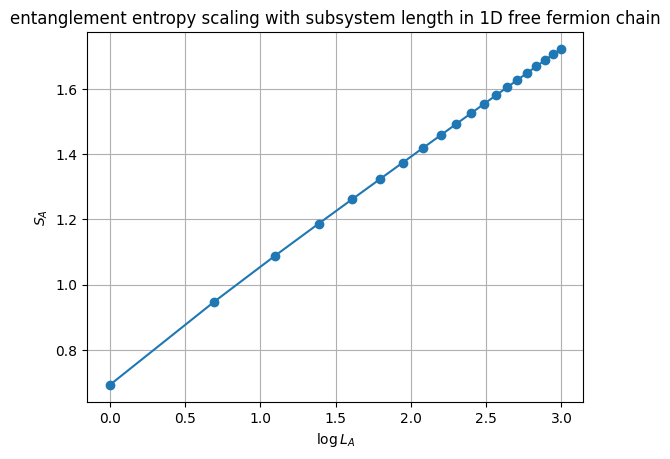

In [ ]:
# plot S vs log(L)
plt.figure()
plt.plot(np.log(sizes), entropies, marker='o')
plt.xlabel(r'$\log L_A$')
plt.ylabel(r'$S_A$')
plt.title('entanglement entropy scaling with subsystem length in 1D free fermion chain')

plt.grid(True)
plt.show()